# __EDA - Open Meteo Breda__

### Introduction to the Weather Data Set

This weather dataset contains meteorological data spanning from January 1, 2015, to May 1, 2024. The data was sourced from the Open-Meteo API and includes various weather parameters recorded at a specific location with latitude 51.5904 and longitude 4.7936 (Breda). The dataset is structured to provide insights into weather patterns and trends over nearly a decade.

#### Data Fields

1. **time**: Timestamp of the recorded data, indicating the specific date and hour of observation. This column is crucial for temporal analysis and trend detection.
   
2. **temperature_2m (°C)**: Temperature measured at a height of 2 meters above ground level, expressed in degrees Celsius. This field helps in understanding the daily and seasonal temperature variations.

3. **rain (mm)**: The amount of rainfall recorded, expressed in millimeters.

4. **snowfall (cm)**: The amount of snowfall recorded, expressed in centimeters.

5. **snow_depth (m)**: The depth of snow on the ground, expressed in meters.

6. **weather_code (wmo code)**: The weather condition code according to the World Meteorological Organization (WMO) standards. This code provides standardized information about the observed weather conditions, such as clear skies, fog, drizzle, rain, snow, and thunderstorms.

WMO weather codes are numeric and correspond to specific weather conditions.

0: Clear sky

1: Mainly clear, a few clouds

2: Partly cloudy

3: Overcast

45: Fog

51: Light drizzle

53: Moderate drizzle

55: Heavy drizzle

61: Light rain

63: Moderate rain

65: Heavy rain

71: Light snow

73: Moderate snow

75: Heavy snow

95: Thunderstorm, slight or moderate

97: Thunderstorm with hail

Using WMO Weather Codes
These codes can be useful for adding another dimension to your risk level analysis.

#### Risk Level

Low Risk: Total intensity less than 0.4 cm (4 mm of rain or snow).

Medium Risk: Total intensity between 0.4 cm and 1.25 cm (4 mm to 12.5 mm of rain or snow).

High Risk: Total intensity greater than 1.25 cm (12.5 mm of rain or snow).

#### Data Source

The dataset was retrieved using the [Open-Meteo API](https://open-meteo.com/en/docs/historical-weather-api#latitude=51.5904&longitude=4.7936&hourly=temperature_2m,rain,snowfall,snow_depth,weather_code&timezone=auto), a reliable source for historical weather data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Gebruiker/Desktop/Y1D - Group 18/openmeteobreda.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81816 entries, 0 to 81815
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     81816 non-null  object 
 1   temperature_2m (°C)      81816 non-null  float64
 2   rain (mm)                81816 non-null  float64
 3   snowfall (cm)            81816 non-null  float64
 4   snow_depth (m)           81816 non-null  float64
 5   weather_code (wmo code)  81816 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [14]:
df.head()

,time,temperature_2m (°C),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),year,month,season_label
0,2015-01-01 00:00:00,1.7,0.0,0.0,0.03,0,2015,1,Winter
1,2015-01-01 01:00:00,1.4,0.0,0.0,0.03,0,2015,1,Winter
2,2015-01-01 02:00:00,1.1,0.0,0.0,0.03,0,2015,1,Winter
3,2015-01-01 03:00:00,0.9,0.0,0.0,0.03,0,2015,1,Winter
4,2015-01-01 04:00:00,0.8,0.0,0.0,0.03,0,2015,1,Winter


In [4]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

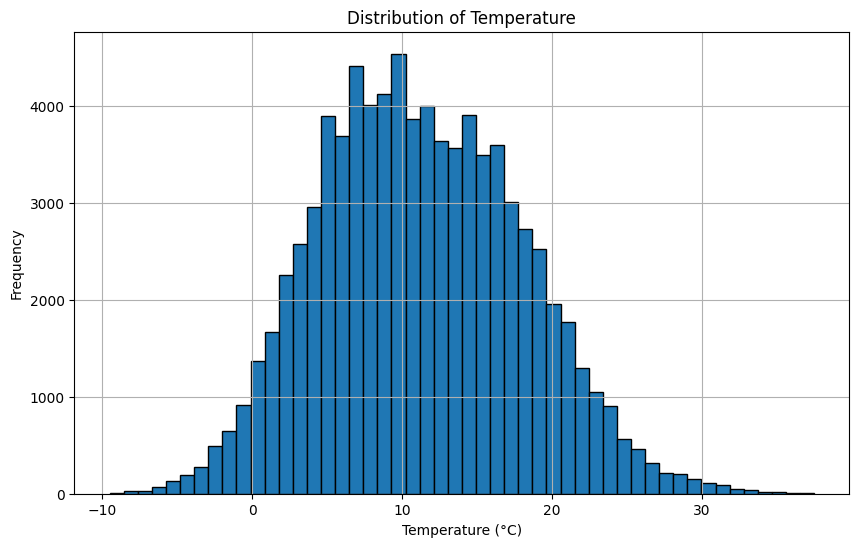

In [5]:
# Distribution of temperature
plt.figure(figsize=(10, 6))
plt.hist(df['temperature_2m (°C)'], bins=50, edgecolor='k')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

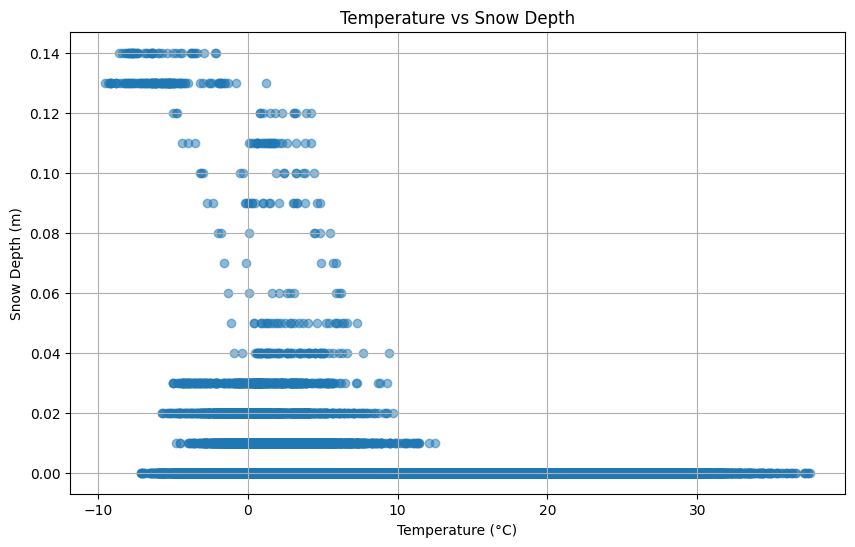

In [6]:
# Scatter plot of temperature vs snow depth

plt.figure(figsize=(10, 6))
plt.scatter(df['temperature_2m (°C)'], df['snow_depth (m)'], alpha=0.5)
plt.title('Temperature vs Snow Depth')
plt.xlabel('Temperature (°C)')
plt.ylabel('Snow Depth (m)')
plt.grid(True)
plt.show()


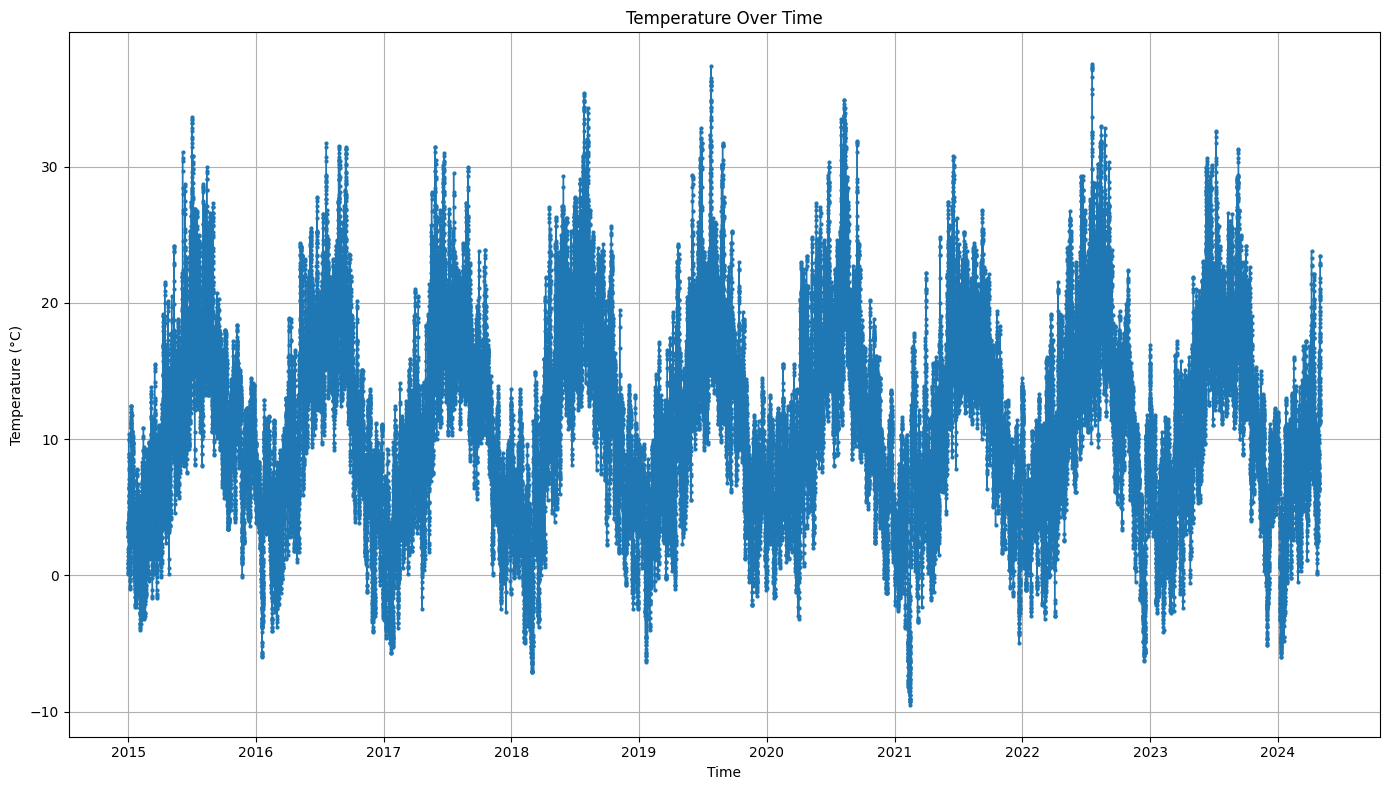

In [7]:
# Plot temperature over time
plt.figure(figsize=(14, 8))
plt.plot(df['time'], df['temperature_2m (°C)'], marker='o', linestyle='-', markersize=2, linewidth=1)
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


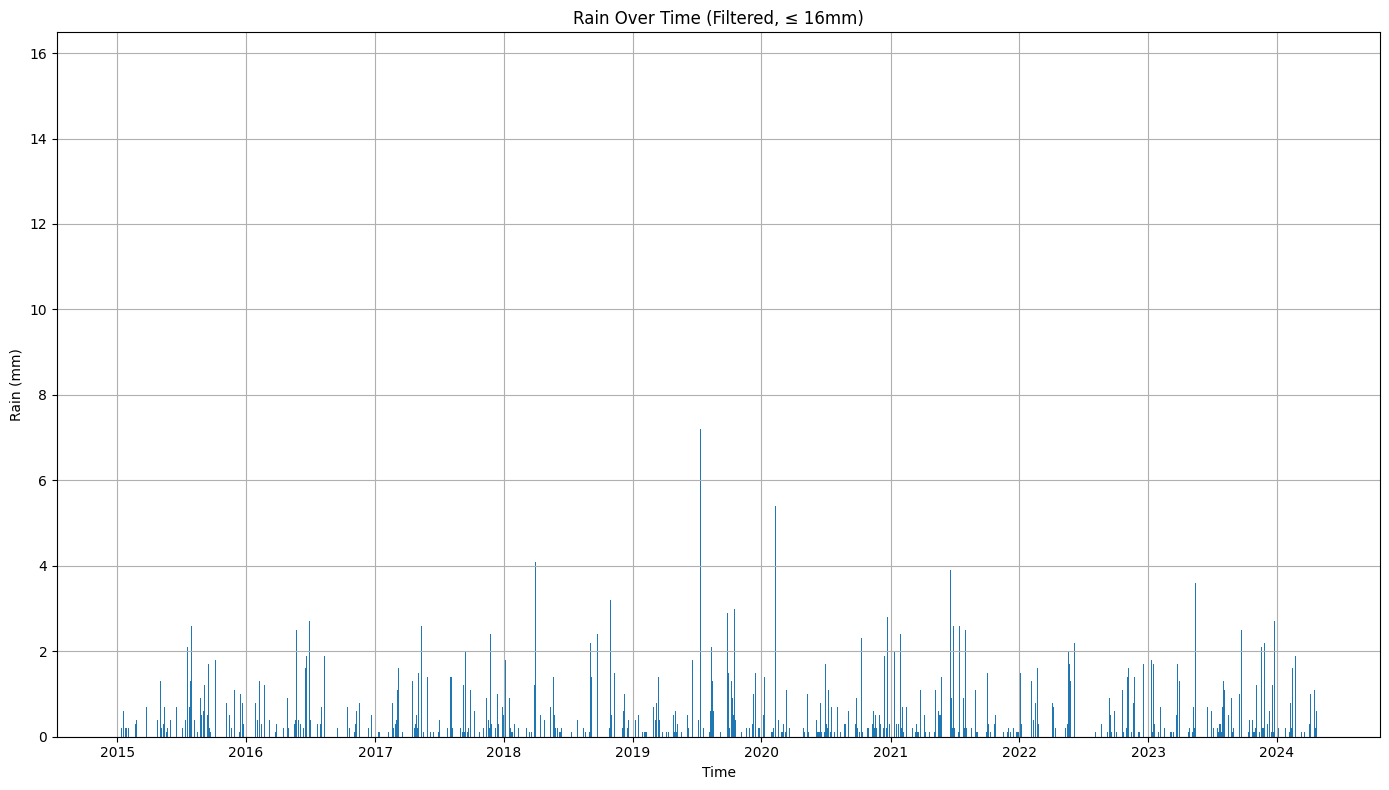

In [8]:
# Filter the data for rain values up to 16mm
df_rain_filtered = df[df['rain (mm)'] <= 16]

# Plotting the filtered rain data
plt.figure(figsize=(14, 8))
plt.bar(df_rain_filtered['time'], df_rain_filtered['rain (mm)'], width=0.2)
plt.title('Rain Over Time (Filtered, ≤ 16mm)')
plt.xlabel('Time')
plt.ylabel('Rain (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

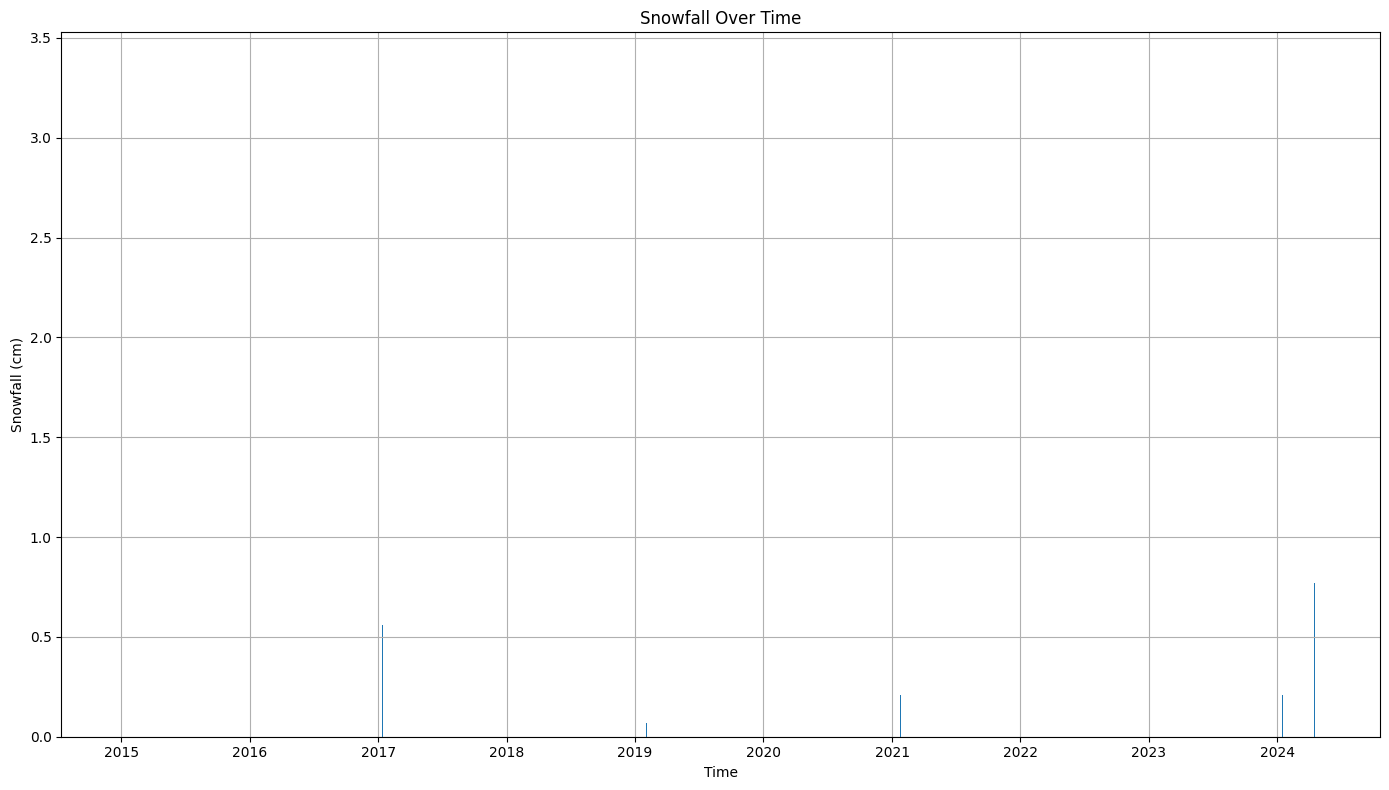

In [9]:
# Plot snowfall over time
plt.figure(figsize=(14, 8))
plt.bar(df['time'], df['snowfall (cm)'], width=0.02)
plt.title('Snowfall Over Time')
plt.xlabel('Time')
plt.ylabel('Snowfall (cm)')
plt.grid(True)
plt.tight_layout()
plt.show()

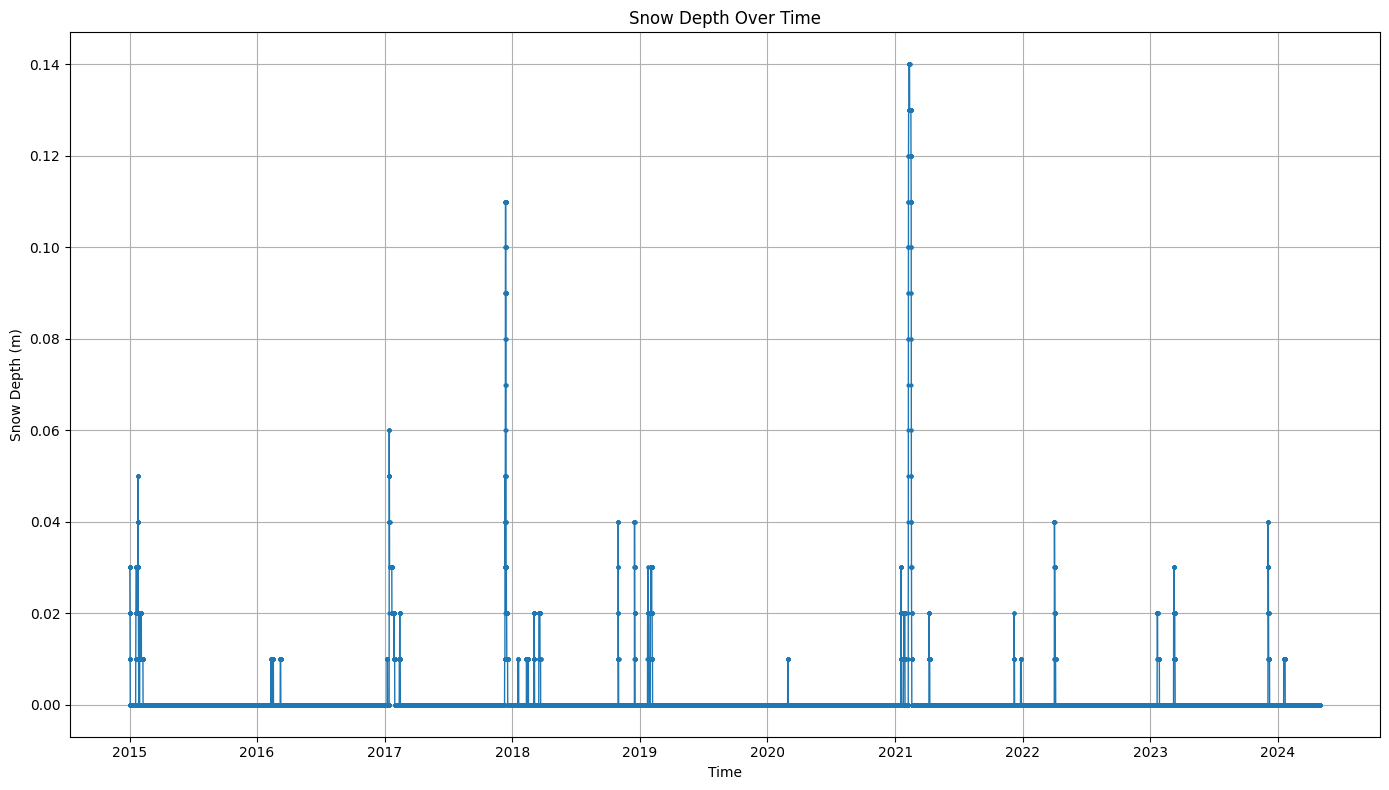

In [10]:
# Plot snow depth over time
plt.figure(figsize=(14, 8))
plt.plot(df['time'], df['snow_depth (m)'], marker='o', linestyle='-', markersize=2, linewidth=1)
plt.title('Snow Depth Over Time')
plt.xlabel('Time')
plt.ylabel('Snow Depth (m)')
plt.grid(True)
plt.tight_layout()
plt.show()

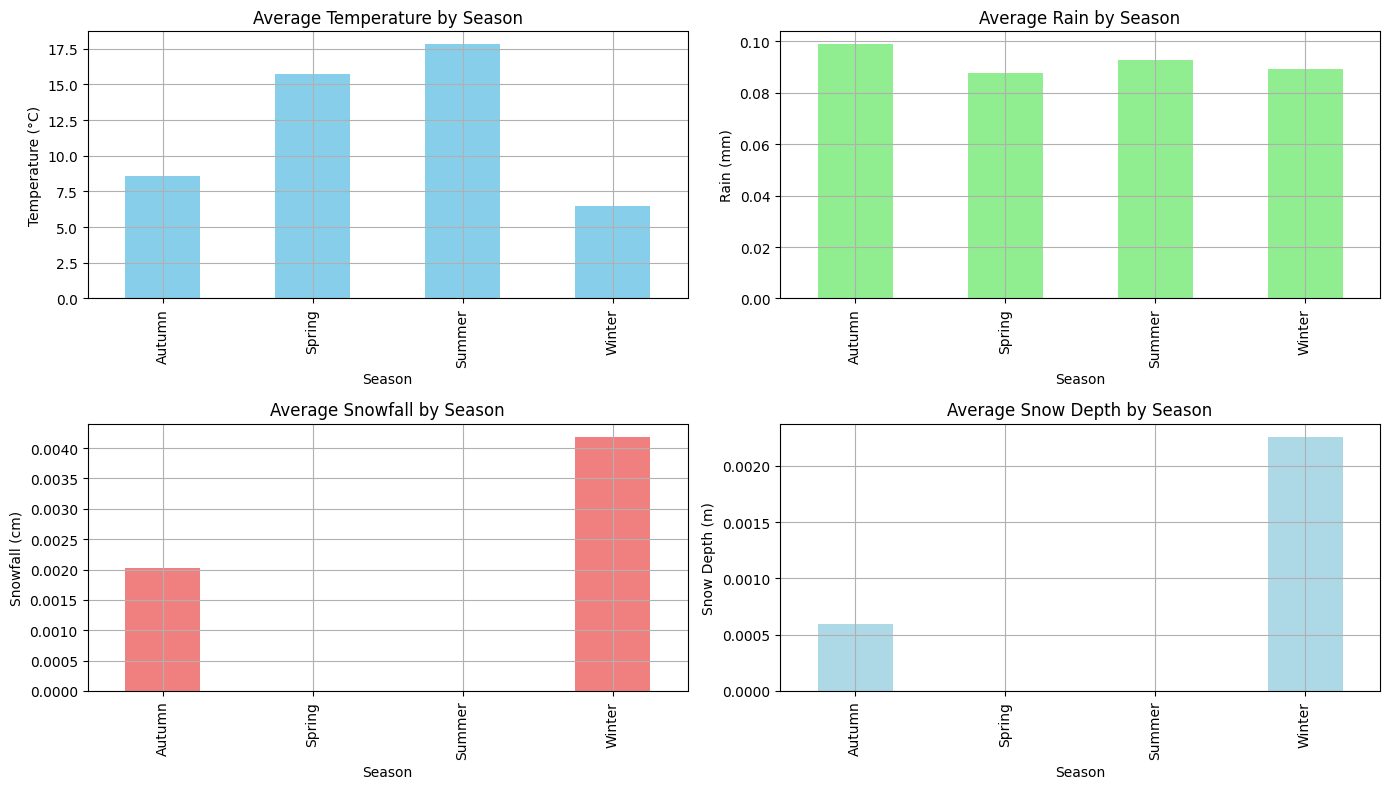

In [11]:
# Extract year, month, and season
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

def label_season(month):
    if month in [1, 2, 3, 4]:
        return 'Winter'
    elif month in [5, 6]:
        return 'Spring'
    elif month in [7, 8, 9]:
        return 'Summer'
    else:
        return 'Autumn'

df['season_label'] = df['month'].apply(label_season)

# Group by season and calculate mean values
seasonal_data = df.groupby('season_label').mean()

# Plot seasonal trends
plt.figure(figsize=(14, 8))

# Temperature seasonal trend
plt.subplot(2, 2, 1)
seasonal_data['temperature_2m (°C)'].plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Rain seasonal trend
plt.subplot(2, 2, 2)
seasonal_data['rain (mm)'].plot(kind='bar', color='lightgreen')
plt.title('Average Rain by Season')
plt.xlabel('Season')
plt.ylabel('Rain (mm)')
plt.grid(True)

# Snowfall seasonal trend
plt.subplot(2, 2, 3)
seasonal_data['snowfall (cm)'].plot(kind='bar', color='lightcoral')
plt.title('Average Snowfall by Season')
plt.xlabel('Season')
plt.ylabel('Snowfall (cm)')
plt.grid(True)

# Snow depth seasonal trend
plt.subplot(2, 2, 4)
seasonal_data['snow_depth (m)'].plot(kind='bar', color='lightblue')
plt.title('Average Snow Depth by Season')
plt.xlabel('Season')
plt.ylabel('Snow Depth (m)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
start_date = '2017-01-01'
end_date = '2024-05-31'
df_filtered = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Select only numeric columns for resampling
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Resample the data to daily frequency and aggregate the values for numeric columns only
df_daily = df_filtered.set_index('time').resample('D')[numeric_columns].mean().reset_index()

# Verify the result
print(df_daily.head())

        time  temperature_2m (°C)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0 2017-01-01            -0.754167   0.004167        0.00000             0.0   
1 2017-01-02             1.304167   0.070833        0.00875             0.0   
2 2017-01-03             2.808333   0.000000        0.00000             0.0   
3 2017-01-04             5.658333   0.050000        0.00000             0.0   
4 2017-01-05             0.787500   0.008333        0.00000             0.0   

   weather_code (wmo code)  
0                 4.958333  
1                16.500000  
2                 1.875000  
3                14.250000  
4                 4.416667  


        time  temperature_2m (°C)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0 2017-01-01            -0.754167   0.004167        0.00000             0.0   
1 2017-01-02             1.304167   0.070833        0.00875             0.0   
2 2017-01-03             2.808333   0.000000        0.00000             0.0   
3 2017-01-04             5.658333   0.050000        0.00000             0.0   
4 2017-01-05             0.787500   0.008333        0.00000             0.0   

   weather_code (wmo code)  
0                 4.958333  
1                16.500000  
2                 1.875000  
3                14.250000  
4                 4.416667  
           time  rain (mm)  snowfall (cm) risk_level
0    2017-01-01   0.004167        0.00000        Low
1    2017-01-02   0.070833        0.00875        Low
2    2017-01-03   0.000000        0.00000        Low
3    2017-01-04   0.050000        0.00000        Low
4    2017-01-05   0.008333        0.00000        Low
...         ...        ...       

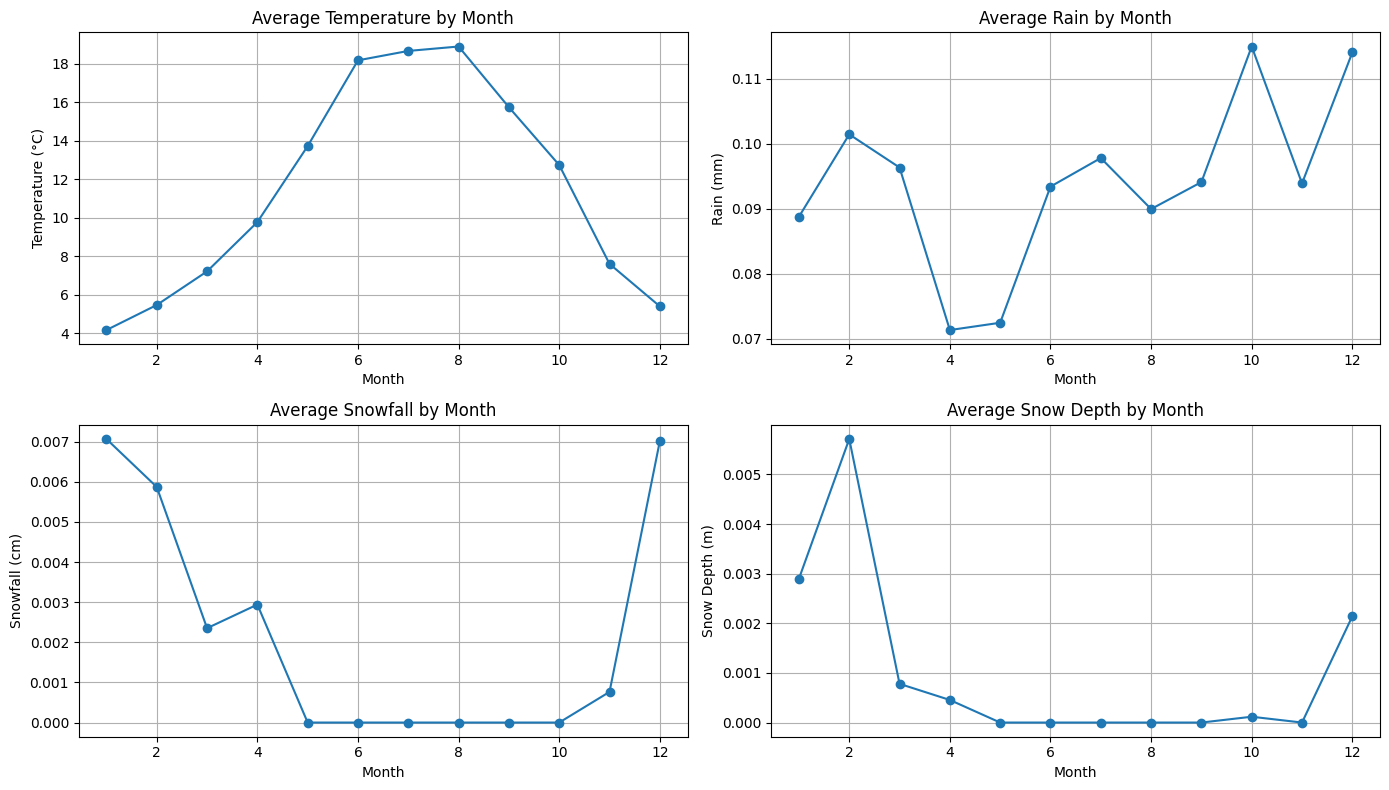

In [13]:
# Filter the data for the date range from 2017 to May 2024
start_date = '2017-01-01'
end_date = '2024-05-31'
df_filtered = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Select only numeric columns for resampling
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Resample the data to daily frequency and aggregate the values for numeric columns only
df_daily = df_filtered.set_index('time').resample('D')[numeric_columns].mean().reset_index()

# Verify the result
print(df_daily.head())

# Define the function to determine risk level based on daily rainfall and snowfall
def determine_risk(rain_intensity, snow_intensity):
    total_intensity = rain_intensity + snow_intensity  # Combine rain and snow intensities
    if total_intensity < 0.4:
        return 'Low'
    elif 0.4 <= total_intensity <= 1.25:
        return 'Mid'
    else:
        return 'High'

# Apply the function to determine the risk level
df_daily['risk_level'] = df_daily.apply(lambda row: determine_risk(row['rain (mm)'], row['snowfall (cm)']), axis=1)

# Print the DataFrame with the new column
print(df_daily[['time', 'rain (mm)', 'snowfall (cm)', 'risk_level']])

# Monthly analysis
df_daily['month'] = df_daily['time'].dt.month
monthly_data = df_daily.groupby('month').mean(numeric_only=True)

# Plot monthly trends
plt.figure(figsize=(14, 8))

# Temperature monthly trend
plt.subplot(2, 2, 1)
monthly_data['temperature_2m (°C)'].plot(kind='line', marker='o')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Rain monthly trend
plt.subplot(2, 2, 2)
monthly_data['rain (mm)'].plot(kind='line', marker='o')
plt.title('Average Rain by Month')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.grid(True)

# Snowfall monthly trend
plt.subplot(2, 2, 3)
monthly_data['snowfall (cm)'].plot(kind='line', marker='o')
plt.title('Average Snowfall by Month')
plt.xlabel('Month')
plt.ylabel('Snowfall (cm)')
plt.grid(True)

# Snow depth monthly trend
plt.subplot(2, 2, 4)
monthly_data['snow_depth (m)'].plot(kind='line', marker='o')
plt.title('Average Snow Depth by Month')
plt.xlabel('Month')
plt.ylabel('Snow Depth (m)')
plt.grid(True)

plt.tight_layout()
plt.show()


____

Filters the data for the specified date range.

Resamples the data to daily frequency.

Calculates the risk level based on the combined daily intensities of rain and snow.

In [16]:
# Filter the data for the date range from 2018 to May 2024
start_date = '2018-01-01'
end_date = '2024-05-31'
df_filtered = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Select only numeric columns for resampling
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Resample the data to daily frequency and aggregate the values for numeric columns only
df_daily = df_filtered.set_index('time').resample('D')[numeric_columns].mean().reset_index()

# Define the function to determine risk level based on daily rainfall and snowfall
def determine_risk(rain_intensity, snow_intensity):
    total_intensity = rain_intensity + (snow_intensity * 10)  # Adjusting snow intensity to be comparable to rain
    if total_intensity < 4:  # Example threshold in mm
        return 'Low'
    elif 4 <= total_intensity <= 12.5:
        return 'Mid'
    else:
        return 'High'

# Apply the function to determine the risk level based on rain and snow
df_daily['risk_level_rain_snow'] = df_daily.apply(lambda row: determine_risk(row['rain (mm)'], row['snowfall (cm)']), axis=1)

# Print the DataFrame with the new column
print(df_daily[['time', 'rain (mm)', 'snowfall (cm)', 'risk_level_rain_snow']])


           time  rain (mm)  snowfall (cm) risk_level_rain_snow
0    2018-01-01   0.329167            0.0                  Low
1    2018-01-02   0.170833            0.0                  Low
2    2018-01-03   0.454167            0.0                  Low
3    2018-01-04   0.125000            0.0                  Low
4    2018-01-05   0.170833            0.0                  Low
...         ...        ...            ...                  ...
2308 2024-04-27   0.358333            0.0                  Low
2309 2024-04-28   0.029167            0.0                  Low
2310 2024-04-29   0.012500            0.0                  Low
2311 2024-04-30   0.012500            0.0                  Low
2312 2024-05-01   0.037500            0.0                  Low

[2313 rows x 4 columns]


Defines the function to determine the risk level based on WMO weather codes.

Applies this function to create a new risk level column based on weather codes.

In [17]:
# Define the function to determine risk level based on WMO weather codes
def determine_risk_wmo(weather_code):
    high_risk_codes = [95, 97]  # Thunderstorm codes
    if weather_code in high_risk_codes:
        return 'High'
    elif weather_code in [61, 63, 65, 71, 73, 75, 45, 51, 53, 55]:  # Moderate risk weather conditions
        return 'Mid'
    else:
        return 'Low'

# Apply the function to determine the risk level based on WMO weather codes
df_daily['risk_level_wmo'] = df_daily['weather_code (wmo code)'].apply(determine_risk_wmo)

# Print the DataFrame with the new column
print(df_daily[['time', 'weather_code (wmo code)', 'risk_level_wmo']])


           time  weather_code (wmo code) risk_level_wmo
0    2018-01-01                27.625000            Low
1    2018-01-02                28.958333            Low
2    2018-01-03                30.166667            Low
3    2018-01-04                18.291667            Low
4    2018-01-05                16.583333            Low
...         ...                      ...            ...
2308 2024-04-27                30.000000            Low
2309 2024-04-28                13.833333            Low
2310 2024-04-29                 5.000000            Low
2311 2024-04-30                 5.666667            Low
2312 2024-05-01                 6.875000            Low

[2313 rows x 3 columns]


Compares the two risk level columns (risk_level_rain_snow and risk_level_wmo).

Highlights and counts the differences between the two risk levels.

Prints the results and provides summary statistics on the differences.

In [18]:
# Compare the risk levels from the two methods
comparison = df_daily[['time', 'risk_level_rain_snow', 'risk_level_wmo']].copy()

# Highlight differences between the two risk levels
comparison['risk_difference'] = comparison['risk_level_rain_snow'] != comparison['risk_level_wmo']

# Print the DataFrame with the comparison
print(comparison[comparison['risk_difference']])

# Summary statistics
difference_count = comparison['risk_difference'].sum()
total_count = len(comparison)
percentage_difference = (difference_count / total_count) * 100

print(f"Total differences: {difference_count} out of {total_count} ({percentage_difference:.2f}%)")


           time risk_level_rain_snow risk_level_wmo  risk_difference
1133 2021-02-07                  Mid            Low             True
Total differences: 1 out of 2313 (0.04%)


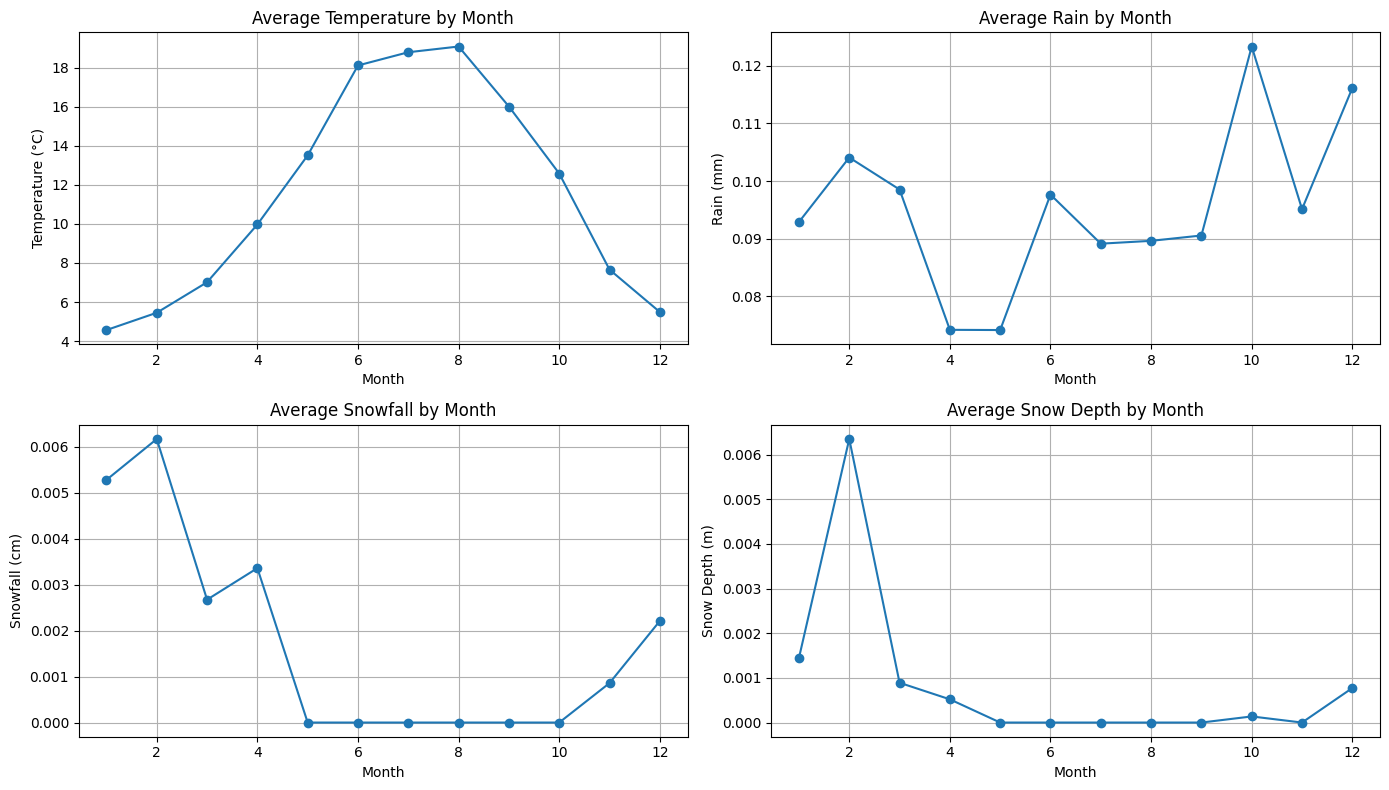

In [19]:
# Plot monthly trends
plt.figure(figsize=(14, 8))

# Temperature monthly trend
plt.subplot(2, 2, 1)
monthly_data['temperature_2m (°C)'].plot(kind='line', marker='o')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Rain monthly trend
plt.subplot(2, 2, 2)
monthly_data['rain (mm)'].plot(kind='line', marker='o')
plt.title('Average Rain by Month')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.grid(True)

# Snowfall monthly trend
plt.subplot(2, 2, 3)
monthly_data['snowfall (cm)'].plot(kind='line', marker='o')
plt.title('Average Snowfall by Month')
plt.xlabel('Month')
plt.ylabel('Snowfall (cm)')
plt.grid(True)

# Snow depth monthly trend
plt.subplot(2, 2, 4)
monthly_data['snow_depth (m)'].plot(kind='line', marker='o')
plt.title('Average Snow Depth by Month')
plt.xlabel('Month')
plt.ylabel('Snow Depth (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

---

[Basic Documents – 2 : Manual on Codes, Volume I.1 – International Codes (WMO-No. 306)
](https://library.wmo.int/viewer/35713?medianame=306_i1_2019_en_#page=1&viewer=picture&o=bookmark&n=0&q=)

Zippenfenig, P. (2023). Open-Meteo.com Weather API [Computer software]. Zenodo. https://doi.org/10.5281/ZENODO.7970649

Hersbach, H., Bell, B., Berrisford, P., Biavati, G., Horányi, A., Muñoz Sabater, J., Nicolas, J., Peubey, C., Radu, R., Rozum, I., Schepers, D., Simmons, A., Soci, C., Dee, D., Thépaut, J-N. (2023). ERA5 hourly data on single levels from 1940 to present [Data set]. ECMWF. https://doi.org/10.24381/cds.adbb2d47

Muñoz Sabater, J. (2019). ERA5-Land hourly data from 2001 to present [Data set]. ECMWF. https://doi.org/10.24381/CDS.E2161BAC

Schimanke S., Ridal M., Le Moigne P., Berggren L., Undén P., Randriamampianina R., Andrea U., Bazile E., Bertelsen A., Brousseau P., Dahlgren P., Edvinsson L., El Said A., Glinton M., Hopsch S., Isaksson L., Mladek R., Olsson E., Verrelle A., Wang Z.Q. (2021). CERRA sub-daily regional reanalysis data for Europe on single levels from 1984 to present [Data set]. ECMWF. https://doi.org/10.24381/CDS.622A565A